## Decision Tree



In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import graphviz

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

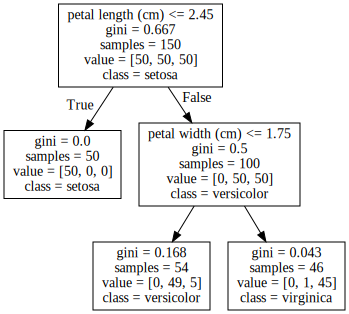

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file = "tree.dot", 
                feature_names = iris.feature_names[2:],
                class_names=iris.target_names)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

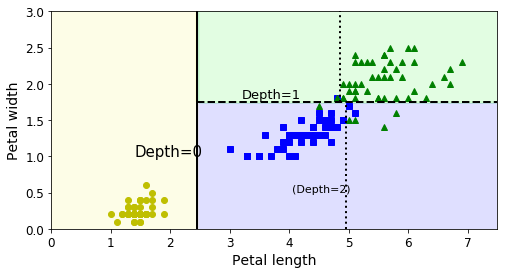

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [0]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [0]:
tree_clf.predict([[1,0.5]])

array([0])

In [0]:
tree_clf.predict([[5,1.5]])

array([1])

In [0]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [0]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

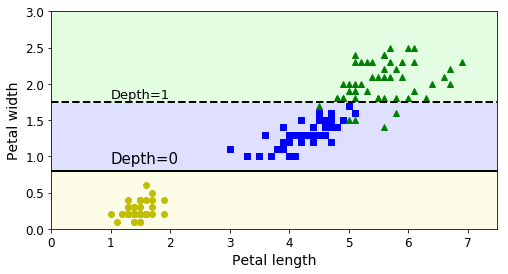

In [0]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plt.show()

## Tree Exercise

In [0]:
!wget https://raw.githubusercontent.com/arbi11/YCBS-272/master/spamdata.csv

--2019-08-02 18:47:06--  https://raw.githubusercontent.com/arbi11/YCBS-272/master/spamdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 703377 (687K) [text/plain]
Saving to: ‘spamdata.csv.1’

spamdata.csv.1      100%[===================>] 686.89K  --.-KB/s    in 0.05s   

2019-08-02 18:47:07 (12.5 MB/s) - ‘spamdata.csv.1’ saved [703377/703377]



In [0]:
import pandas as pd
df1 = pd.read_csv('spamdata.csv')
df1.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,fon,zeros,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,semicol,parentheses,backet,exclamation,dollar,sharp,length_average,length_longest,length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [0]:
df1.head()

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,fon,zeros,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,semicol,parentheses,backet,exclamation,dollar,sharp,length_average,length_longest,length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [0]:
df1.tail()

,make,address,all,3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,you,credit,your,fon,zeros,money,hp,hpl,george,650,lab,labs,telnet,857,data,415,85,technology,1999,parts,pm,direct,cs,meeting,original,project,re,edu,table,conference,semicol,parentheses,backet,exclamation,dollar,sharp,length_average,length_longest,length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
make               4601 non-null float64
 address           4601 non-null float64
 all               4601 non-null float64
 3d                4601 non-null float64
 our               4601 non-null float64
 over              4601 non-null float64
 remove            4601 non-null float64
 internet          4601 non-null float64
 order             4601 non-null float64
 mail              4601 non-null float64
 receive           4601 non-null float64
 will              4601 non-null float64
 people            4601 non-null float64
 report            4601 non-null float64
 addresses         4601 non-null float64
 free              4601 non-null float64
 business          4601 non-null float64
 email             4601 non-null float64
 you               4601 non-null float64
 credit            4601 non-null float64
 your              4601 non-null float64
 fon               4601 non-null

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydot
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
X = df1.iloc[:,:57]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size = 0.2, random_state=1)

In [0]:
classification_tree_spam = DecisionTreeClassifier(max_depth=58, random_state=42)
classification_tree_spam.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=58,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

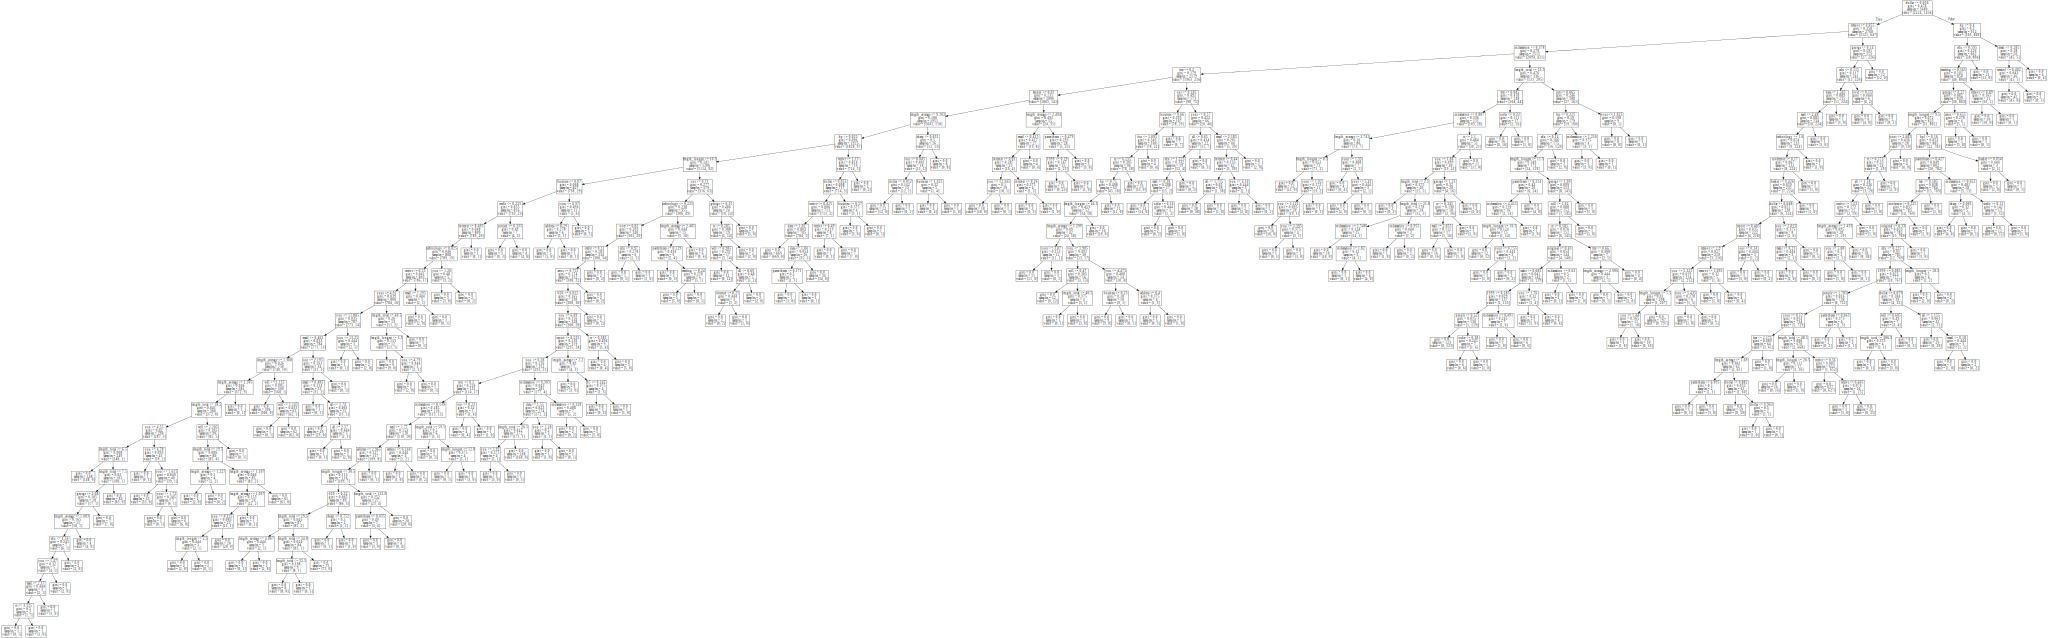

In [0]:
export_graphviz(classification_tree_spam, 
                out_file = "spam_tree.dot", 
                feature_names = X_train.columns)

with open("spam_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [0]:
pred = classification_tree_spam.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)

      No  Yes
No   526   36
Yes   38  321


In [0]:
#We can use accuracy_score function
accuracy_score(y_test, pred)

0.9196525515743756

0.9207383279044516
14


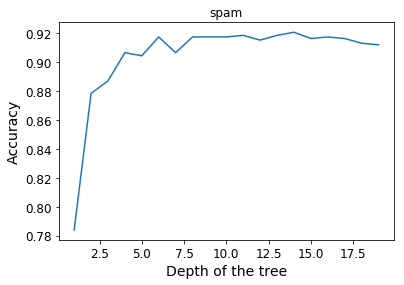

In [0]:


# Initialize the accuracy_score vector
acc = []
depth = np.arange(1, 20)
max1=0
index=0
# Calculate accuracy score on the test set for different depths of the tree
for i in depth:
    # Fit the Regression Tree
    dt = DecisionTreeClassifier(max_depth=i,min_samples_leaf=2)
    dt.fit(X_train,y_train)
    # Predict on the test set
    y_pred = dt.predict(X_test)
    # Compute the accuracy
    score = accuracy_score(y_test, y_pred)  
    acc.append(score)
    if score>max1:
      max1=score
      index=i
# Plot results    
plt.plot(depth, acc, '-')
plt.xlabel('Depth of the tree')
plt.ylabel('Accuracy')
plt.title('spam');

print(max1)
print(index)

In [0]:
classification_tree_spam = DecisionTreeClassifier(max_depth=10, random_state=50)
classification_tree_spam.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

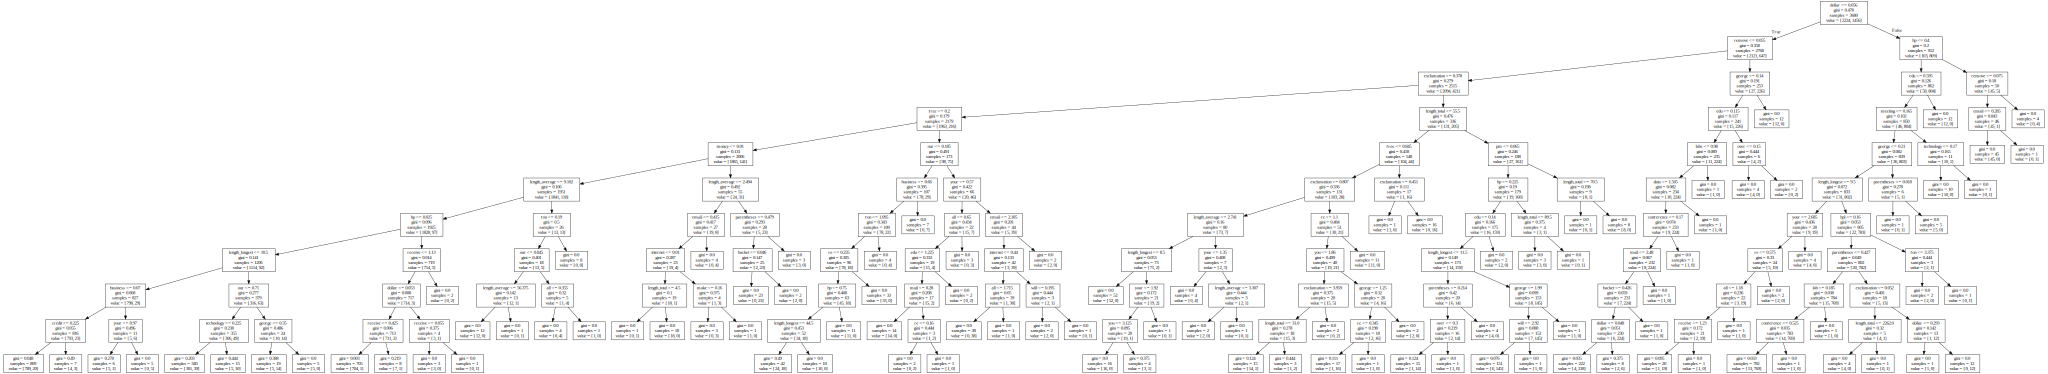

In [0]:
export_graphviz(classification_tree_spam, 
                out_file = "spam_tree.dot", 
                feature_names = X_train.columns)

with open("spam_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [0]:
pred = classification_tree_spam.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)

      No  Yes
No   536   45
Yes   28  312


In [0]:
accuracy_score(y_test, pred)

0.9207383279044516

In [0]:
classification_tree_spam = DecisionTreeClassifier(max_depth=10, random_state=50,min_samples_leaf=5)
classification_tree_spam.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

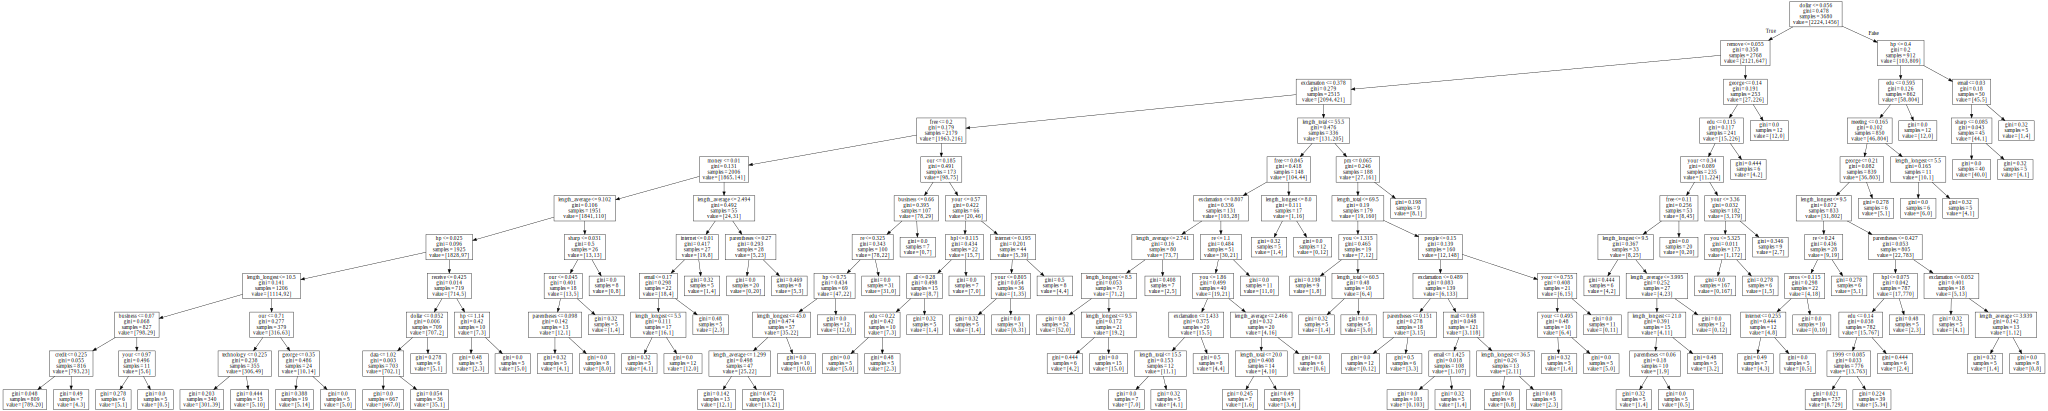

In [0]:
export_graphviz(classification_tree_spam, 
                out_file = "spam_tree.dot", 
                feature_names = X_train.columns)

with open("spam_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [0]:
pred = classification_tree_spam.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, 
                  index = ['No', 'Yes'], 
                  columns = ['No', 'Yes'])
print(cm)

      No  Yes
No   532   47
Yes   32  310


In [0]:
accuracy_score(y_test, pred)

0.9142236699239956

In [0]:
!wget https://raw.githubusercontent.com/arbi11/YCBS-272/master/Auto.csv

--2019-08-02 18:47:10--  https://raw.githubusercontent.com/arbi11/YCBS-272/master/Auto.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18079 (18K) [text/plain]
Saving to: ‘Auto.csv.1’

Auto.csv.1          100%[===================>]  17.66K  --.-KB/s    in 0.01s   

2019-08-02 18:47:10 (1.77 MB/s) - ‘Auto.csv.1’ saved [18079/18079]



In [0]:
#X = df1.iloc[:,:57]
#y = df1.iloc[:,-1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

classification_tree_spam = DecisionTreeClassifier(max_depth = 10)

from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(classification_tree_spam, n_estimators=100, \
                        random_state=1)
bag.fit(X_train, y_train)

y_hat = bag.predict(X_train)
accuracy_score(y_train, y_hat)

0.9698369565217392

In [0]:
y_hat = bag.predict(X_test)
accuracy_score(y_test, y_hat)

0.9446254071661238

In [0]:
df2 = pd.read_csv('Auto.csv', na_values=['?'], na_filter=True)
df2 = df2.dropna() #Removes the whole raw if 1 missing value

In [0]:
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [0]:
X = df2[['cylinders', 'displacement', 'horsepower', \
         'weight', 'acceleration']]
y = df2['mpg']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [0]:
regr_tree_auto=DecisionTreeRegressor()
regr_tree_auto.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

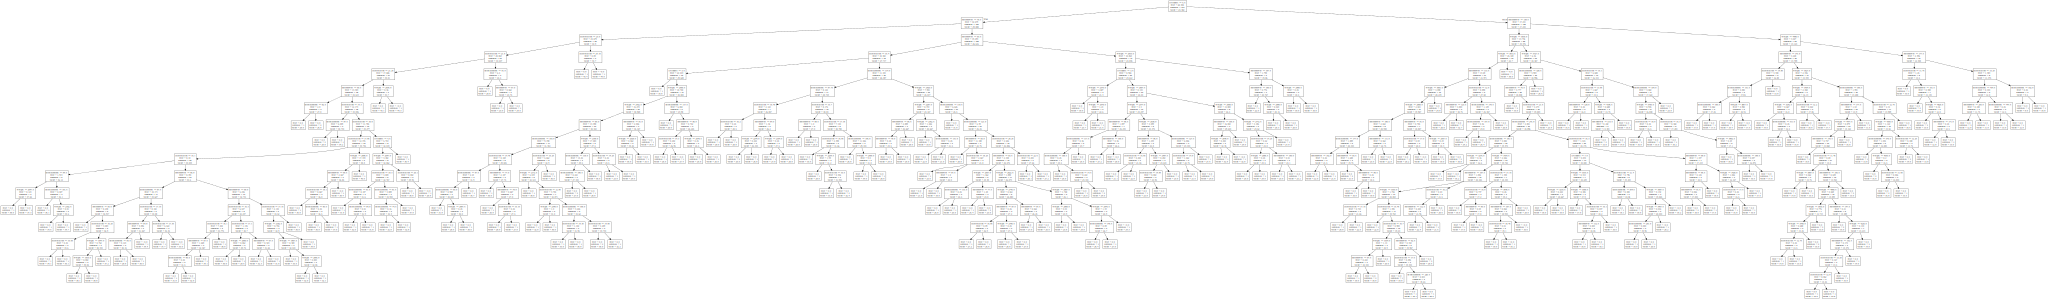

In [0]:
export_graphviz(regr_tree_auto, 
                out_file = "auto_tree.dot", 
                feature_names = X_train.columns)

with open("auto_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Text(0, 0.5, 'y_test')

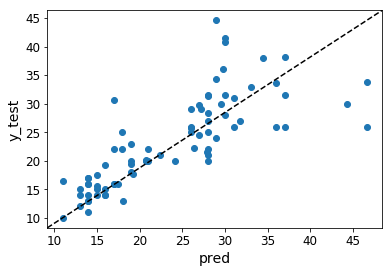

In [0]:
pred = regr_tree_auto.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'mpg')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

In [0]:
mean_squared_error(y_test, pred)

30.640759493670885

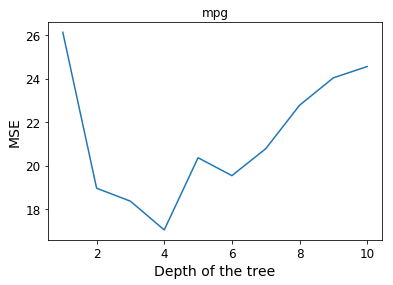

In [0]:
#X = df2[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
#y = df2['mpg']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initialize the MSE vector
mse = []
depth = np.arange(1, 11)

# Calculate MSE on the test set for different depths of the tree
for i in depth:
    # Fit the Regression Tree
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train,y_train)
    # Predict on the test set
    y_pred = dt.predict(X_test)
    # Compute the MSE
    score = mean_squared_error(y_test, y_pred)
    
    mse.append(score)
    
# Plot results    
plt.plot(depth, mse, '-')
plt.xlabel('Depth of the tree')
plt.ylabel('MSE')
plt.title('mpg');

In [0]:
regr_tree_auto = DecisionTreeRegressor(max_depth = 2)

from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(regr_tree_auto, n_estimators=100, random_state=1)
bag.fit(X_train, y_train)

y_hat = bag.predict(X_train)
mean_squared_error(y_train, y_hat)

13.550708115785085

In [0]:
y_hat = bag.predict(X_test)
mean_squared_error(y_test, y_hat)

15.799254721973645